### Importing Libraries and Dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!mv IBM-HR-dataset.csv /content/gdrive/MyDrive/


mv: cannot stat 'IBM-HR-dataset.csv': No such file or directory


In [ ]:
with open('/content/gdrive/MyDrive/IBM-HR-dataset.csv', 'r') as f:
  print(f.read())


﻿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Res

In [ ]:
# Read the text file into a DataFrame
employee_data = pd.read_csv('/content/gdrive/MyDrive/IBM-HR-dataset.csv')

employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data Cleaning & Preprocessing





In [ ]:
#check for null values
employee_data.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in this dataset.



### Exploratory Data Analysis





In [ ]:
employee_data.shape


(1470, 35)

In [ ]:
employee_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
employee_data.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#data that are categorical
employee_data.select_dtypes(include=['object']).dtypes


Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [ ]:
employee_data['Attrition'].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
#encode the attrition column so we can use it for EDA
employee_data['Attrition'] = employee_data['Attrition'].factorize(['No','Yes'])[0]
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


Attrition: No = 0 Yes = 1



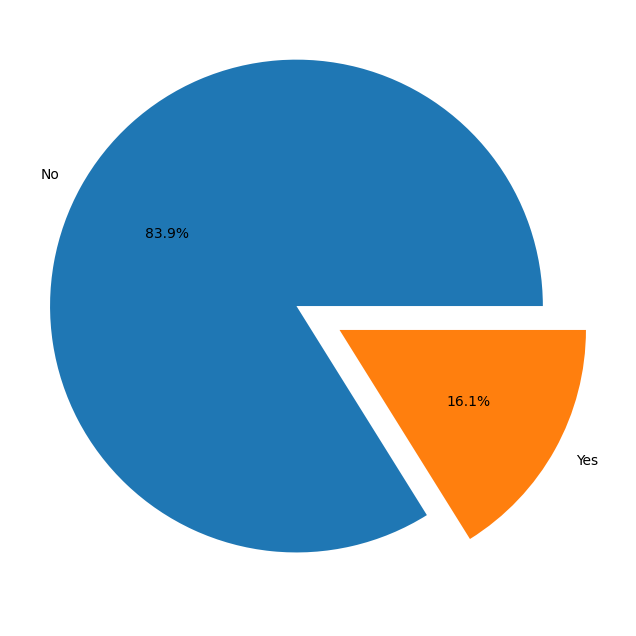

In [ ]:
plt.figure(figsize=(8,8))
pie = employee_data.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

In [ ]:
# data that is numeric
employee_data.select_dtypes(include=['int64']).dtypes


Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [ ]:
employee_data[['Age']].value_counts().sort_values(ascending=False).head(10)


Age
35     78
34     77
36     69
31     69
29     68
32     61
30     60
38     58
33     58
40     57
dtype: int64

In [ ]:
employee_data[['Age']].value_counts().sort_values(ascending=False).tail(10)


Age
56     14
23     14
58     14
21     13
20     11
59     10
19      9
18      8
60      5
57      4
dtype: int64

Most employees are in their 30s with 35 year olds having the highest count and lowest are people at around the age 60 or less than 20.

In [ ]:
employee_data['StandardHours'].value_counts()


80    1470
Name: StandardHours, dtype: int64

In [ ]:
employee_data['EmployeeCount'].value_counts()


1    1470
Name: EmployeeCount, dtype: int64

In [ ]:
employee_data['Over18'].value_counts()


Y    1470
Name: Over18, dtype: int64

<ipython-input-46-4c13aa6b1d4c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = employee_data.corr()


<Axes: >

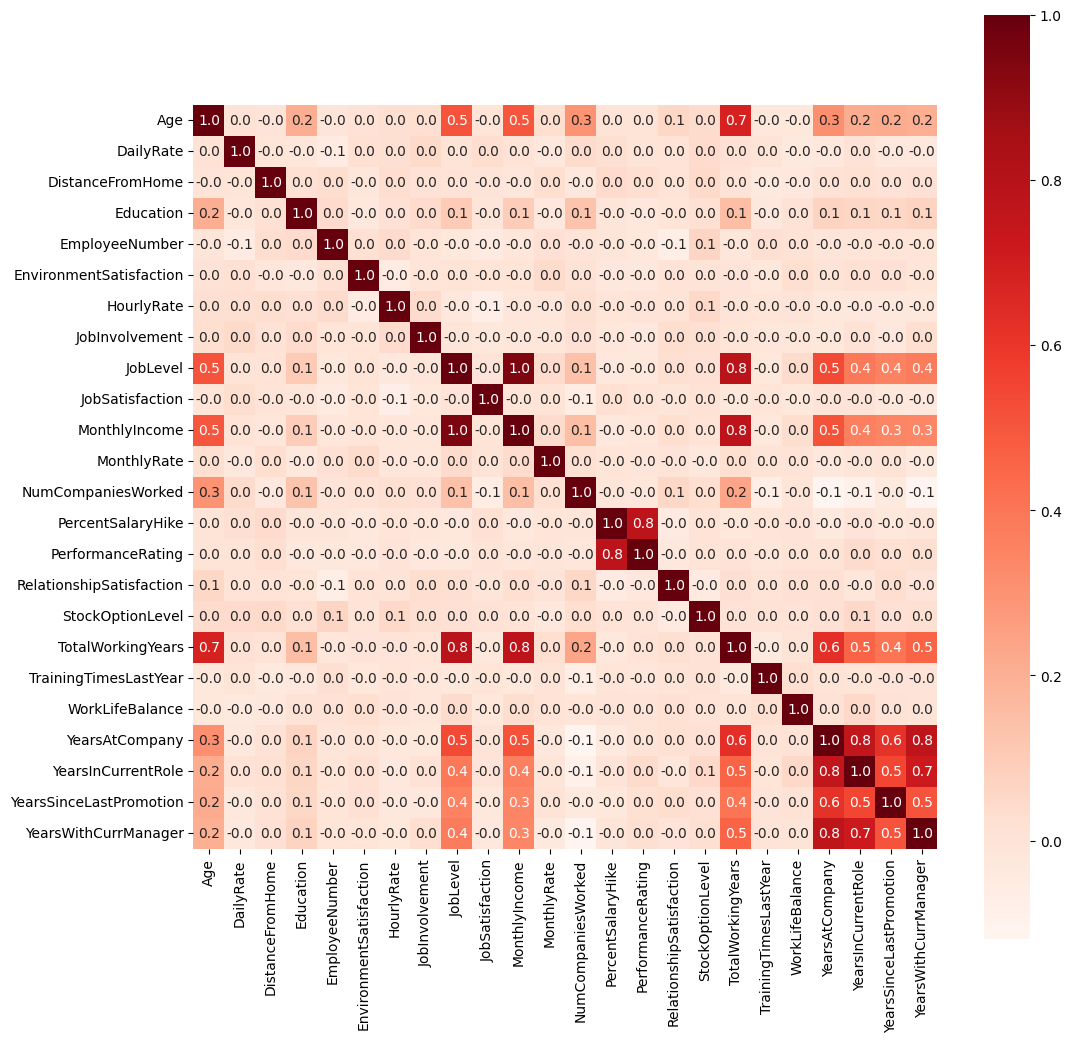

In [ ]:
#use a heatmap to check correlation between the variables.
employee_data = employee_data.drop(['EmployeeCount','StandardHours','Over18'], axis=1) # dropping these two columns because they only have one value
corr = employee_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

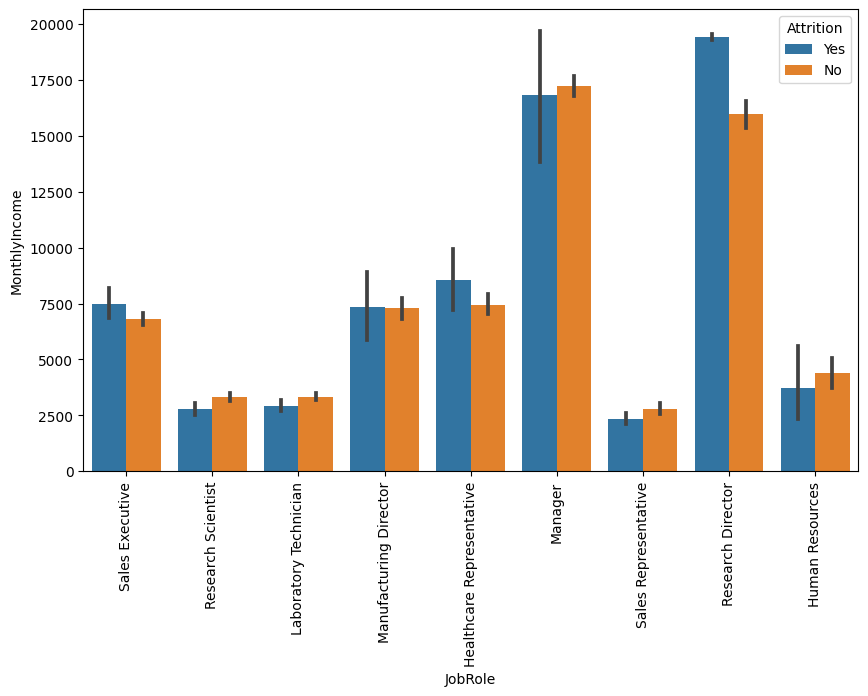

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=employee_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

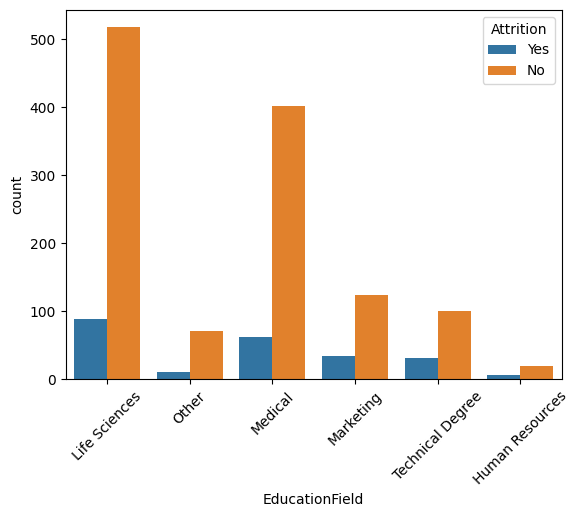

In [ ]:
sns.countplot(x='EducationField', hue='Attrition', data=employee_data);
plt.xticks(rotation=45)

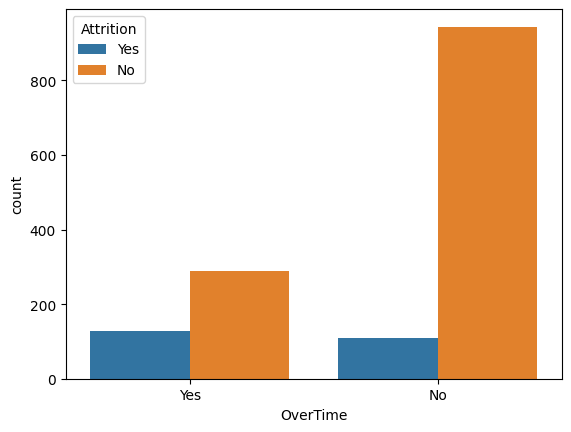

In [ ]:
sns.countplot(x='OverTime', hue='Attrition', data=employee_data);


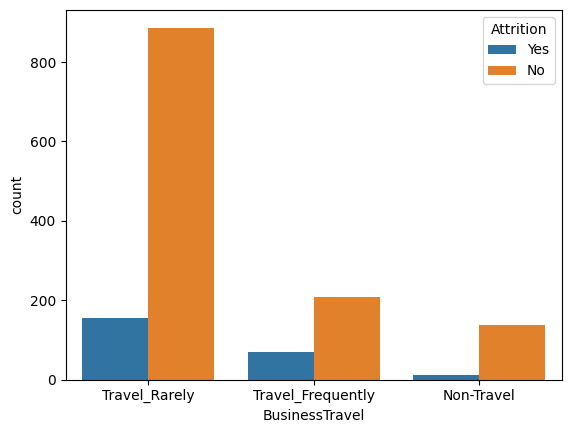

In [ ]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=employee_data);


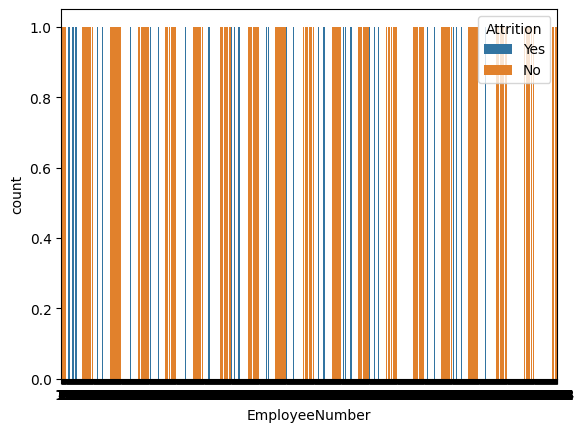

In [ ]:
sns.countplot(x='EmployeeNumber', hue='Attrition', data=employee_data);


### Splitting Data

In [ ]:
# Separating the features from the target (In the process, we will drop features that we don't think are key factors.)
X = employee_data.drop(['Attrition','BusinessTravel','EducationField','OverTime','EmployeeNumber'],axis=1) # Features
y = employee_data['Attrition'] # Target

In [ ]:
from sklearn.utils import resample

# Assuming that df is your DataFrame and 'class' is your target feature
df_majority = employee_data[employee_data['Attrition'] == 0]
df_minority = employee_data[employee_data['Attrition'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled['Attrition'].value_counts())


0    1233
1    1233
Name: Attrition, dtype: int64


In [ ]:
# Separating the features from the target (In the process, we will drop features that we don't think are key factors.)
x = df_upsampled.drop(['Attrition','BusinessTravel','EducationField','OverTime','EmployeeNumber'],axis=1) # Features
Y = df_upsampled['Attrition'] # Target

In [ ]:
# Label encoding the categorical variables

X['Department'] = preprocessing.LabelEncoder().fit_transform(X['Department'])
X['Education'] = preprocessing.LabelEncoder().fit_transform(X['Education'])
X['JobRole'] = preprocessing.LabelEncoder().fit_transform(X['JobRole'])
X['Gender'] = preprocessing.LabelEncoder().fit_transform(X['Gender'])
X['MaritalStatus'] = preprocessing.LabelEncoder().fit_transform(X['MaritalStatus'])

In [ ]:
# Label encoding the categorical variables

x['Department'] = preprocessing.LabelEncoder().fit_transform(X['Department'])
x['Education'] = preprocessing.LabelEncoder().fit_transform(X['Education'])
x['JobRole'] = preprocessing.LabelEncoder().fit_transform(X['JobRole'])
x['Gender'] = preprocessing.LabelEncoder().fit_transform(X['Gender'])
x['MaritalStatus'] = preprocessing.LabelEncoder().fit_transform(X['MaritalStatus'])

In [ ]:
# Data Standardization
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [ ]:
# Data Standardization to ensure that all features have the same scale
Scaler = StandardScaler()
x = Scaler.fit_transform(x)

In [ ]:
# Splitting Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [ ]:
# Splitting Data for Training and Testing
x_train, x_test, Y_train, Y_test = train_test_split(x,Y,test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 27)
(1176, 27)
(294, 27)


### Model Building

In [ ]:
models = [] # ML Models
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Logistic Regression", LogisticRegression(solver='liblinear')))
models.append(("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss')))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier()))

n_folds = 5
results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=n_folds)
    print("Testing model:", name)

    # Cross Validation Score
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1_weighted", verbose=0, n_jobs=-1)

    # Fitting the Model
    model.fit(X_train,y_train)

    # Model Predictions and Finding Accuracy
    train_pred = model.predict(X_train)
    Training_score = accuracy_score(train_pred,y_train)
    test_pred = model.predict(X_test)
    Test_score = accuracy_score(test_pred,y_test)

    results.append(cv_results)

    msg = f"Cross_Val Mean: {cv_results.mean()}, Training Accuracy: {Training_score}, Testing Accuracy: {Test_score}"
    print(msg + "\n")


Testing model: Random Forest
Cross_Val Mean: 0.794255817809207, Training Accuracy: 1.0, Testing Accuracy: 0.8537414965986394

Testing model: Logistic Regression
Cross_Val Mean: 0.8137892526330358, Training Accuracy: 0.8469387755102041, Testing Accuracy: 0.8469387755102041

Testing model: XGBoost
Cross_Val Mean: 0.8106271601706494, Training Accuracy: 1.0, Testing Accuracy: 0.8435374149659864

Testing model: Decision Tree
Cross_Val Mean: 0.769129975730891, Training Accuracy: 1.0, Testing Accuracy: 0.8197278911564626

Testing model: KNN
Cross_Val Mean: 0.7660308946257042, Training Accuracy: 0.8545918367346939, Testing Accuracy: 0.8367346938775511



In [ ]:
models = [] # ML Models
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Logistic Regression", LogisticRegression(solver='liblinear')))
models.append(("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss')))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier()))

n_folds = 5
results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=n_folds)
    print("Testing model:", name)

    # Cross Validation Score
    cv_results = model_selection.cross_val_score(model, x_train, Y_train, cv=kfold, scoring="f1_weighted", verbose=0, n_jobs=-1)

    # Fitting the Model
    model.fit(x_train,Y_train)

    # Model Predictions and Finding Accuracy
    train_pred = model.predict(x_train)
    Training_score = accuracy_score(train_pred,Y_train)
    test_pred = model.predict(x_test)
    Test_score = accuracy_score(test_pred,Y_test)

    results.append(cv_results)

    msg = f"Cross_Val Mean: {cv_results.mean()}, Training Accuracy: {Training_score}, Testing Accuracy: {Test_score}"
    print(msg + "\n")


Testing model: Random Forest
Cross_Val Mean: 0.957404338761209, Training Accuracy: 1.0, Testing Accuracy: 0.979757085020243

Testing model: Logistic Regression
Cross_Val Mean: 0.6921890486529548, Training Accuracy: 0.7058823529411765, Testing Accuracy: 0.7105263157894737

Testing model: XGBoost
Cross_Val Mean: 0.9431632754355747, Training Accuracy: 1.0, Testing Accuracy: 0.9574898785425101

Testing model: Decision Tree
Cross_Val Mean: 0.8929978863877579, Training Accuracy: 1.0, Testing Accuracy: 0.937246963562753

Testing model: KNN
Cross_Val Mean: 0.7967463613839432, Training Accuracy: 0.8935091277890467, Testing Accuracy: 0.8218623481781376



Testing model: Random Forest


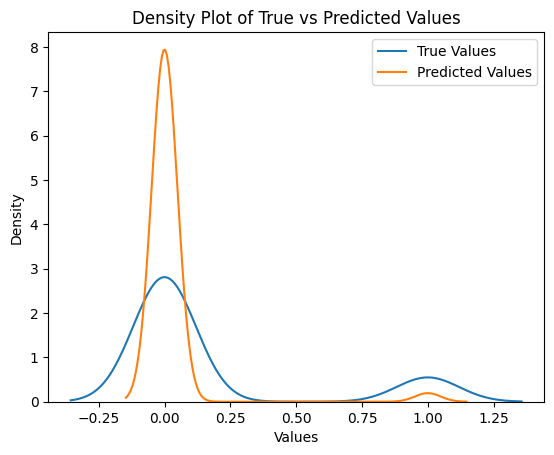

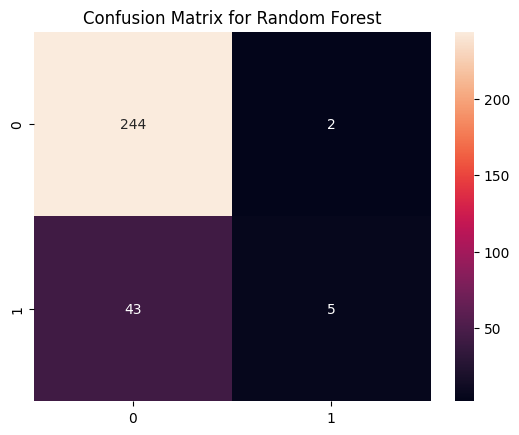

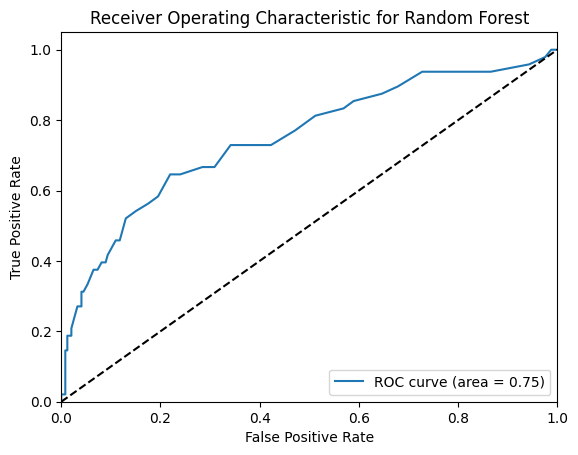

Testing model: Logistic Regression


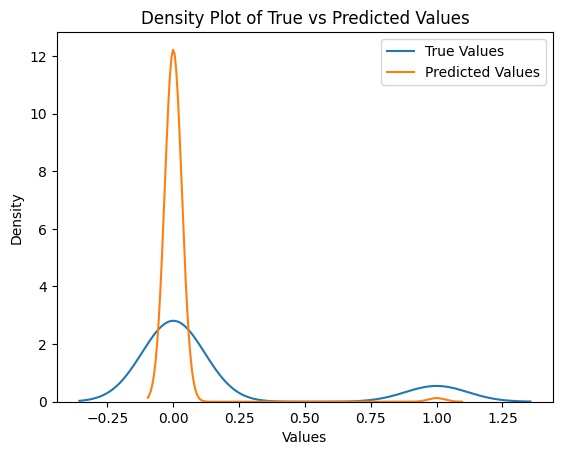

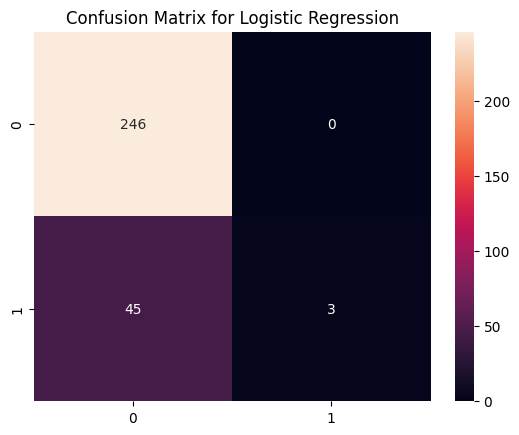

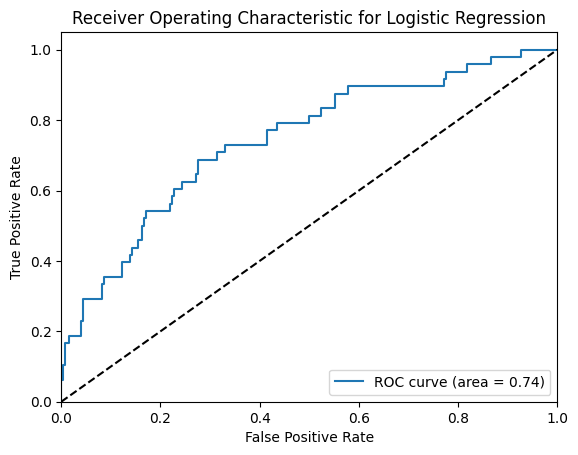

Testing model: XGBoost


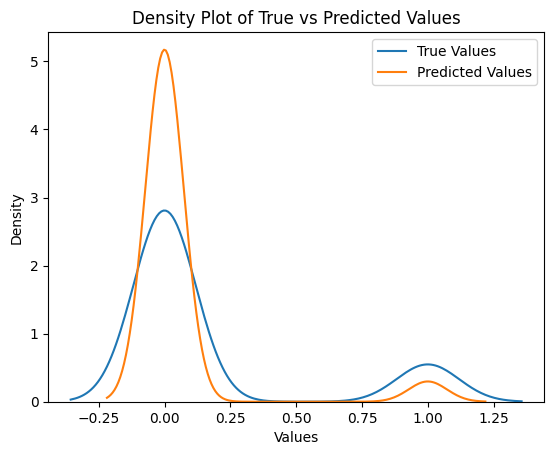

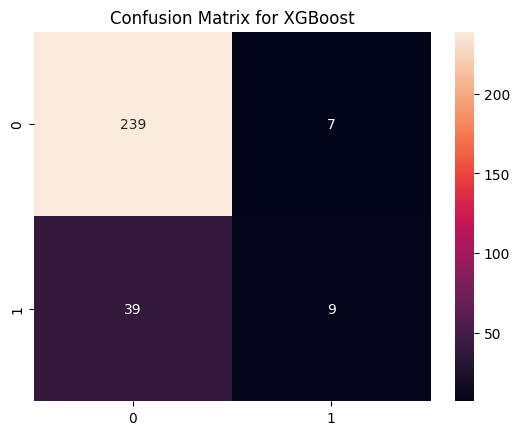

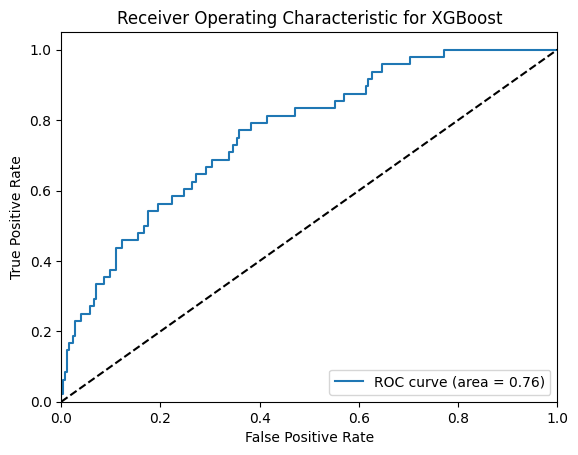

Testing model: Decision Tree


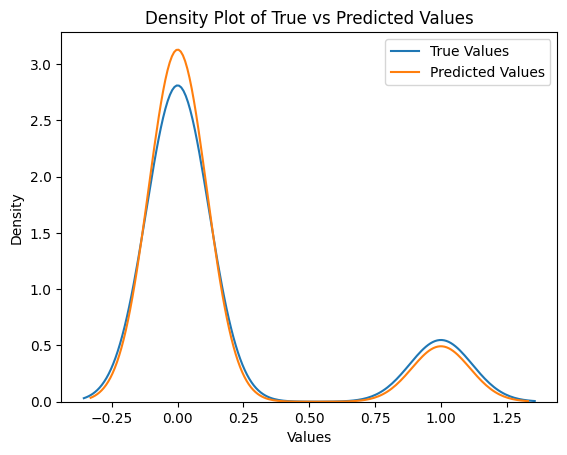

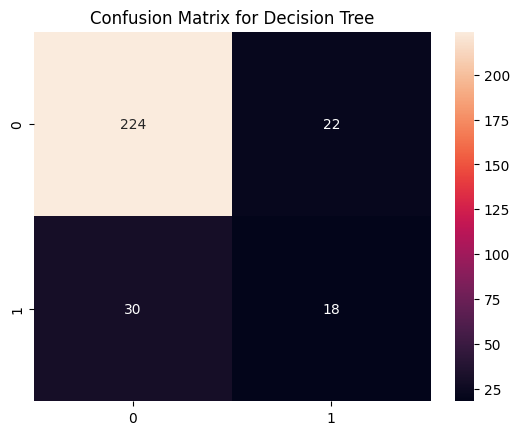

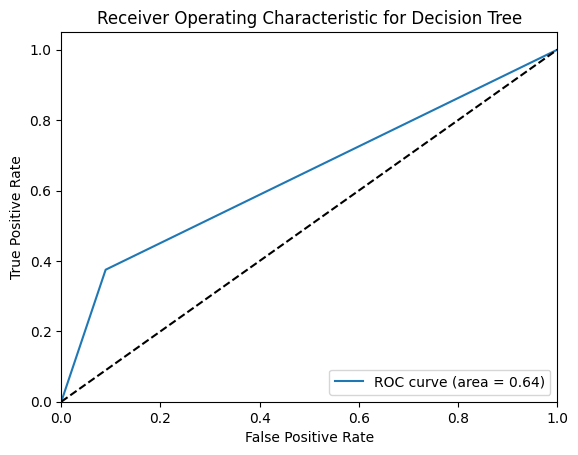

Testing model: KNN


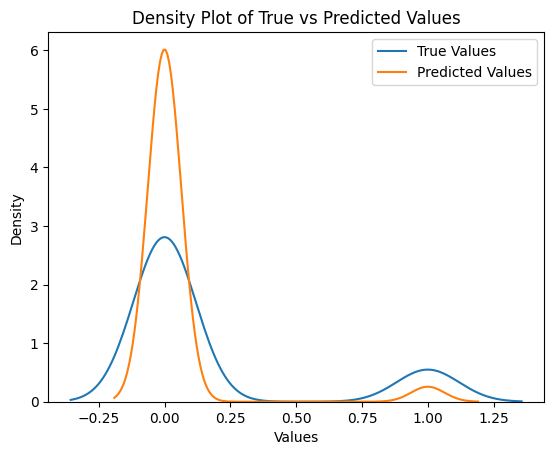

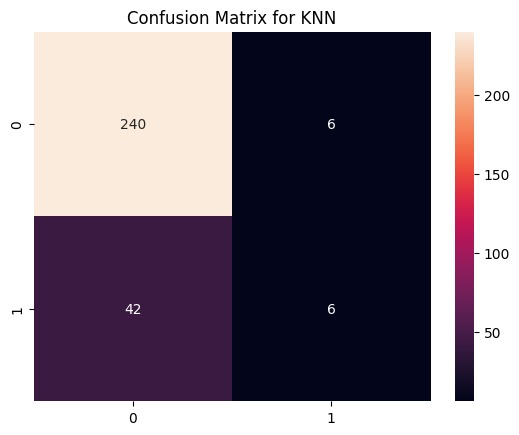

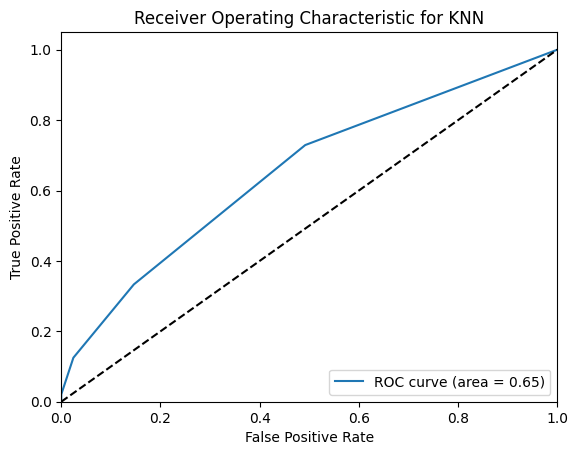

In [ ]:
for name, model in models:
    print("Testing model:", name)

    # Fitting the Model
    model.fit(X_train,y_train)

    # Model Predictions
    test_pred = model.predict(X_test)

    # Density Plot (This is similar to a histogram but provides a smoother curve that shows the distribution of the data).
    sns.kdeplot(y_test, label='True Values')
    sns.kdeplot(test_pred, label='Predicted Values')

    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title('Density Plot of True vs Predicted Values')
    plt.legend(loc='upper right')
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix for ' + name)
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba"):
        probas = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic for ' + name)
        plt.legend(loc="lower right")
        plt.show()


Testing model: Random Forest


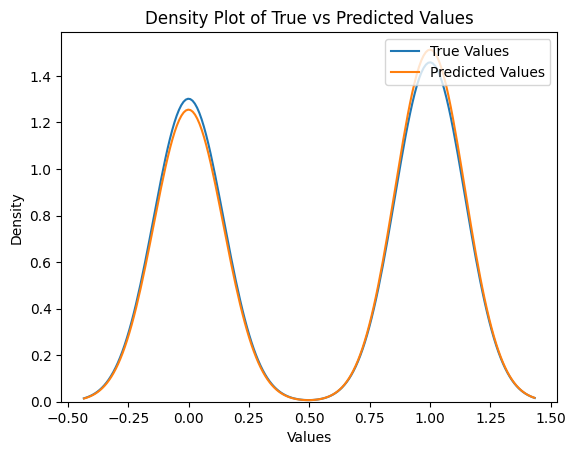

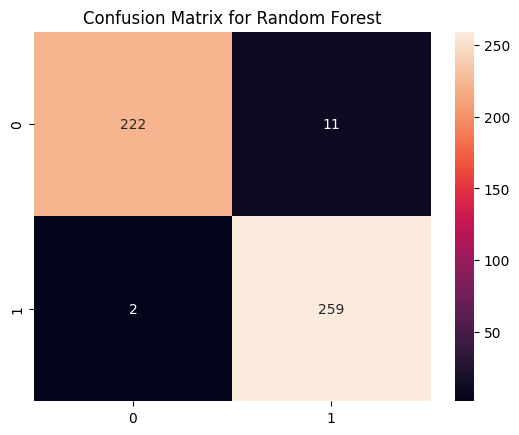

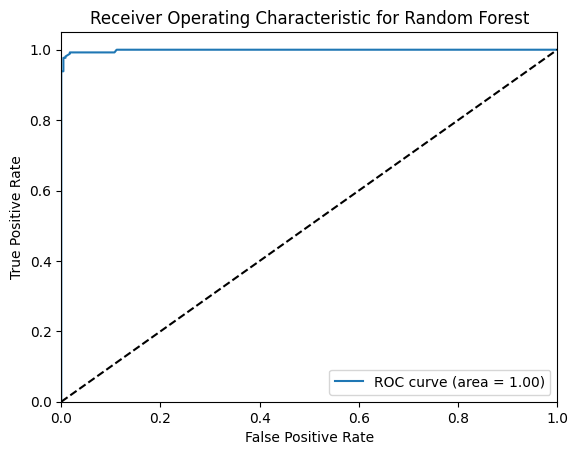

Testing model: Logistic Regression


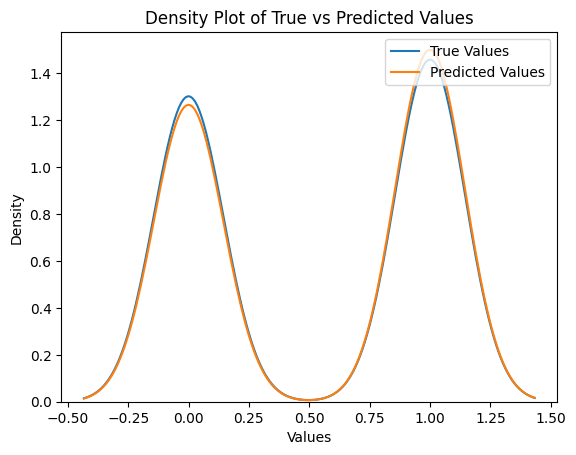

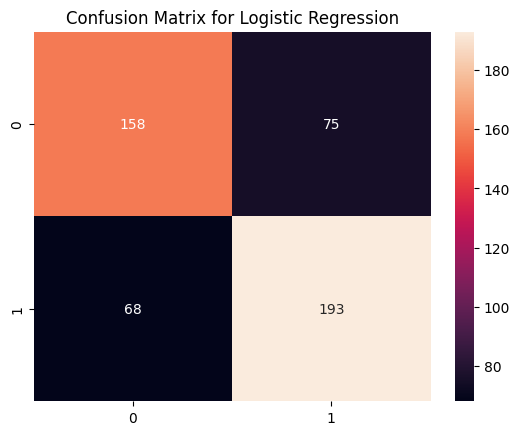

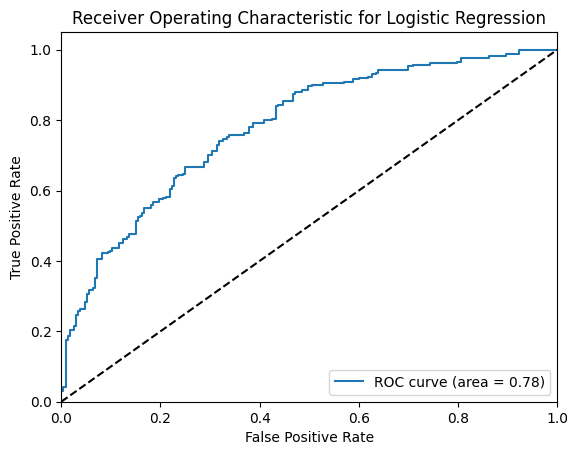

Testing model: XGBoost


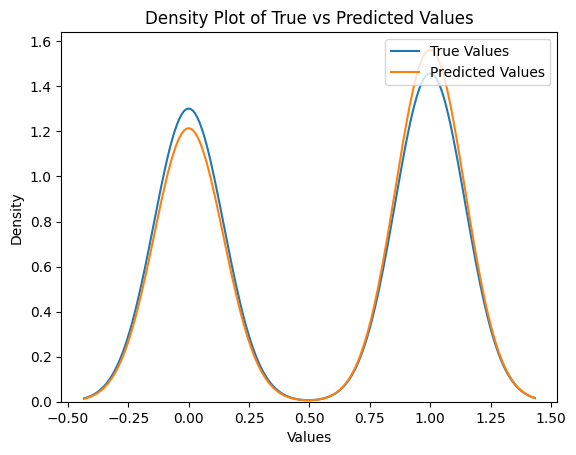

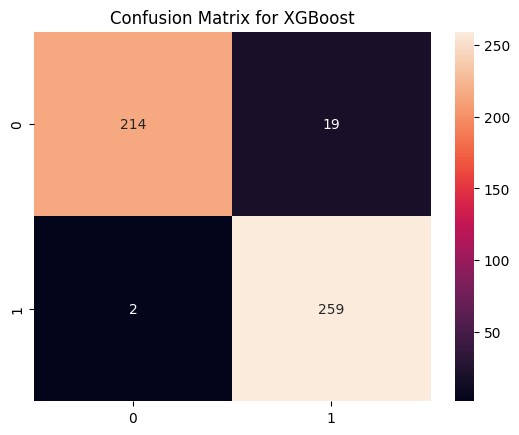

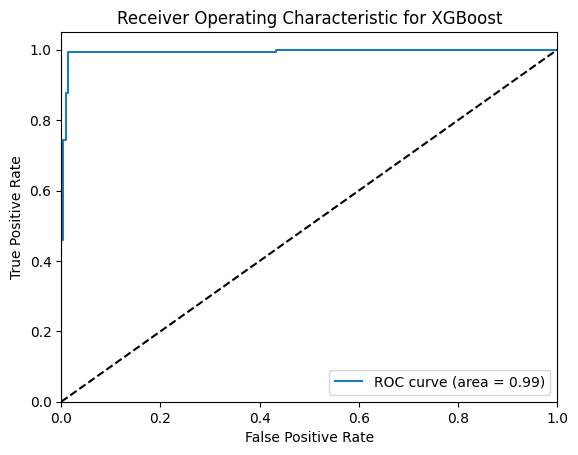

Testing model: Decision Tree


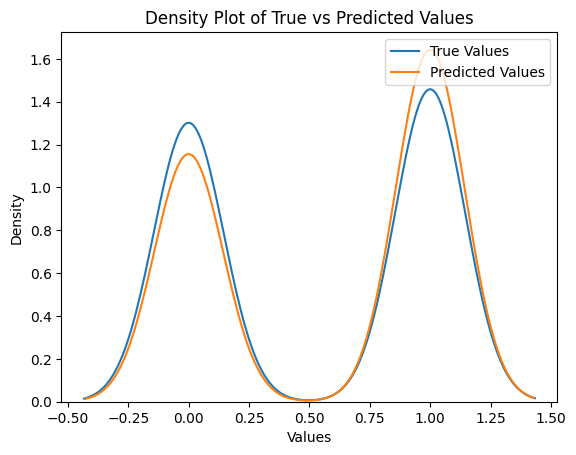

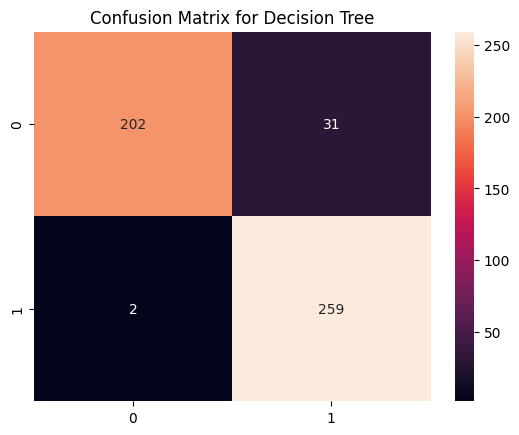

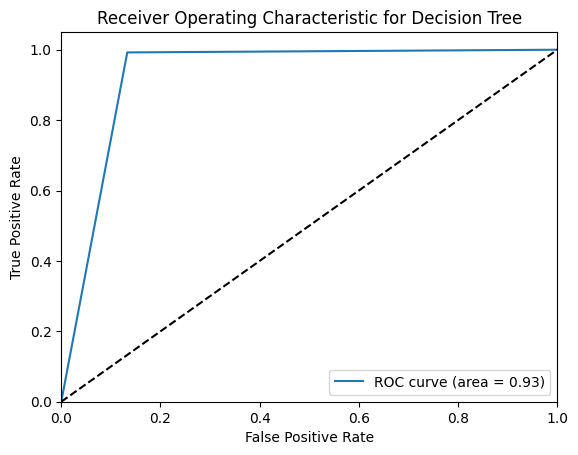

Testing model: KNN


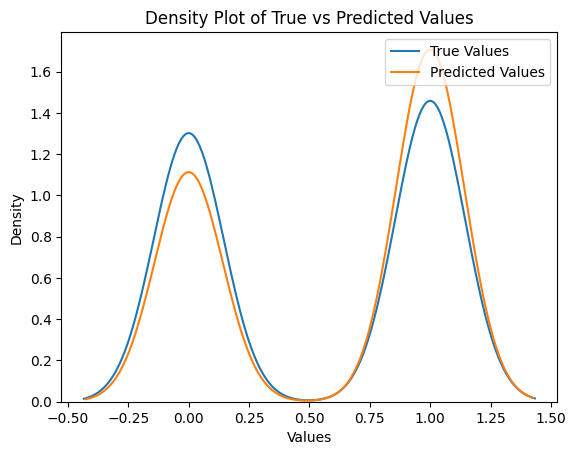

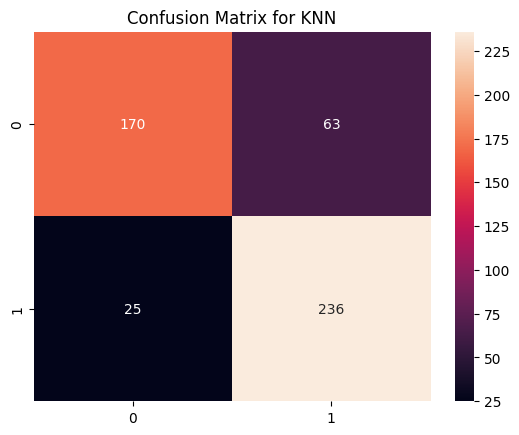

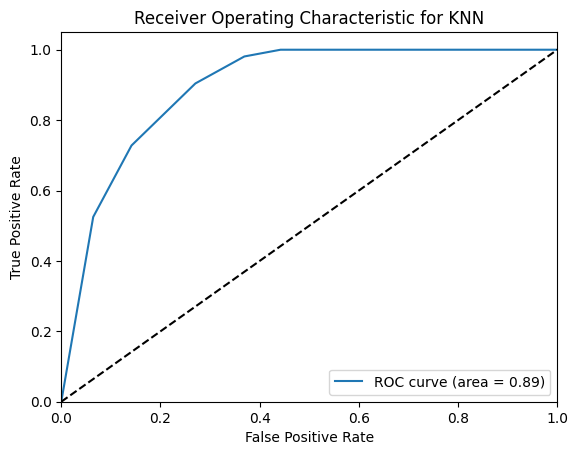

In [ ]:
for name, model in models:
    print("Testing model:", name)

    # Fitting the Model
    model.fit(x_train,Y_train)

    # Model Predictions
    test_pred = model.predict(x_test)

    # Density Plot (This is similar to a histogram but provides a smoother curve that shows the distribution of the data).
    sns.kdeplot(Y_test, label='True Values')
    sns.kdeplot(test_pred, label='Predicted Values')

    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title('Density Plot of True vs Predicted Values')
    plt.legend(loc='upper right')
    plt.show()


    # Confusion Matrix
    cm = confusion_matrix(Y_test, test_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix for ' + name)
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba"):
        probas = model.predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(Y_test, probas[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic for ' + name)
        plt.legend(loc="lower right")
        plt.show()
